# Notebook Interface

In [16]:
%autosave 20

Autosaving every 20 seconds


In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


We want to know how an investment growss with a fixed interest.

The *compound interest* formula states that:
$$R = Pe^{rt}$$
where:

- $P$ is the principal (initial investment).
- $r$ is the annual interest rate, as a decimal.
- $t$ is the time in years.
- $e$ is the base of natural logarithms.
- $R$ is the total return after $t$ years (including principal)

In [3]:
def return_on_investment(principal, interest_rate, number_of_years):
    return principal * e ** (interest_rate * number_of_years)

In [13]:
principal = 250
interest_rate = .034
tstart = 0.0
tend = 5.0
npoints = 6

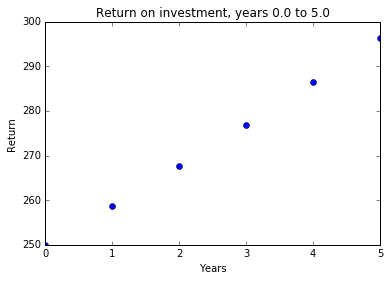

In [14]:
tvalues = linspace(tstart, tend, npoints)
amount_values = return_on_investment(principal, interest_rate, tvalues)
plot(tvalues, amount_values, 'o')
title('Return on investment, years {} to {}'.format(tstart, tend))
xlabel('Years')
ylabel('Return')
tstart += tend
tend += tend

In [ ]:
linspace

#  1. Running Python Scripts

The **%run** magic executes the script in the notebook's notespace so that all global variables, functions, and classes defined in the script are made available in the current notebook.

*Lorenz.py is in the same directory that contains the notebook file.*

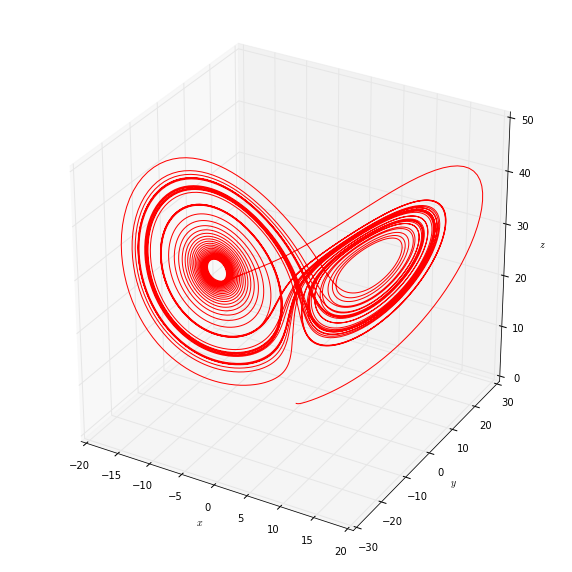

In [18]:
%run lorenz.py

It is also possible to use the **%load** magic for the same purpose:
The difference is that **%load** does not immediately run the script, but places its code in a cell.

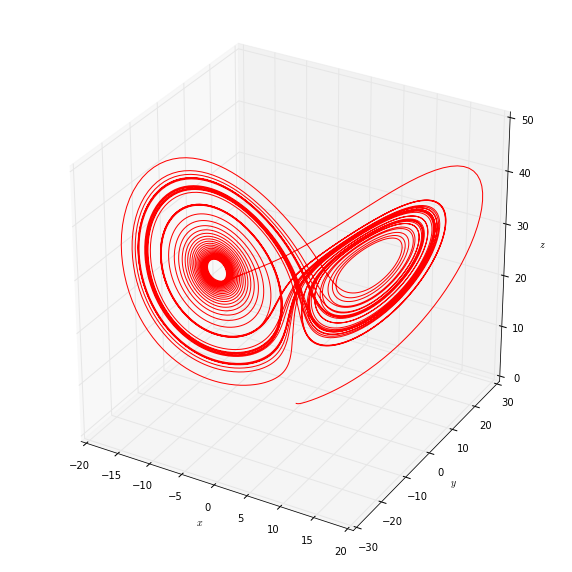

In [20]:
# %load lorenz.py
import numpy as np 
import matplotlib.pyplot as plt 

from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

def make_lorenz(sigma, r, b):
	def func(statevec, t):
		x, y, z = statevec
		return [ sigma * ( y - x), 
		r * x - y - x * z,
		x * y - b * z ]

	return func

lorenz_eq = make_lorenz(10., 28., 8./3.)

tmax = 50
tdelta = 0.005
tvalues = np.arange(0, tmax, tdelta)
ic = np.array([0.0, 1.0, 0.0])
sol = odeint(lorenz_eq, ic, tvalues)

x, y, z = np.array(zip(*sol))

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z , lw = 1, color='red')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

plt.show()

#  2. Running Scripts in other languages

### *Running SVG scripts*

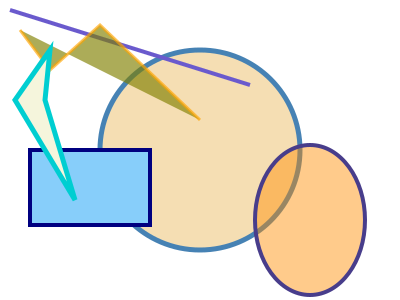

In [23]:
%%SVG
<svg width="400" height="300">
    <circle cx="200" cy="150" r="100"
    style="fill:Wheat; stroke:SteelBlue; stroke-width:5;"/>
    <line x1="10" y1="10" x2="250" y2="85"
    style="stroke:SlateBlue; stroke-width:4"/>
    <polyline points="20,30 50,70 100,25 200,120"
    style="stroke:orange; stroke-width:3;
    fill:olive; opacity:0.65;"/>
    <rect x="30" y="150" width="120" height="75"
    style="stroke:Navy; stroke-width:4; fill:LightSkyBlue;"/>
    <ellipse cx="310" cy="220" rx="55" ry="75"
    style="stroke:DarkSlateBlue; stroke-width:4;
    fill:DarkOrange; fill-opacity:0.45;"/>
    <polygon points="50,50 15,100 75,200 45,100"
    style="stroke:DarkTurquoise; stroke-width:5; fill:Beige;"/>
</svg>

## *Running HTML/JavaScript*

In [24]:
%%html
<h1 id="hellodisplay"> Hello, World! </h1>

In [30]:
%%javascript

element = document.getElementById("hellodisplay")
element.style.color = 'blue'

<IPython.core.display.Javascript object>

# 3. Loading and Saving Data

In [31]:
A = rand(5,10)
print A
save('random_array.npy', A)

[[ 0.07800742  0.9225615   0.3733465   0.32734527  0.07086253  0.19646458
   0.33826463  0.9340205   0.45599466  0.46485176]
 [ 0.54050083  0.7325962   0.2723408   0.03113195  0.17680246  0.76669456
   0.32492218  0.3260824   0.05044368  0.54922264]
 [ 0.90795044  0.19111544  0.70103723  0.53955447  0.52598905  0.81913392
   0.19271227  0.72613961  0.54793893  0.45478075]
 [ 0.00539195  0.6406823   0.28320815  0.17093498  0.3037432   0.92987418
   0.7165274   0.63510785  0.80469571  0.20797471]
 [ 0.91007456  0.30185241  0.01365832  0.74130363  0.79741867  0.20965513
   0.57913599  0.97080919  0.05334529  0.64230151]]


In [32]:
del A
A

NameError: name 'A' is not defined

In [33]:
A

NameError: name 'A' is not defined

In [34]:
A = load('random_array.npy')
A

array([[ 0.07800742,  0.9225615 ,  0.3733465 ,  0.32734527,  0.07086253,
         0.19646458,  0.33826463,  0.9340205 ,  0.45599466,  0.46485176],
       [ 0.54050083,  0.7325962 ,  0.2723408 ,  0.03113195,  0.17680246,
         0.76669456,  0.32492218,  0.3260824 ,  0.05044368,  0.54922264],
       [ 0.90795044,  0.19111544,  0.70103723,  0.53955447,  0.52598905,
         0.81913392,  0.19271227,  0.72613961,  0.54793893,  0.45478075],
       [ 0.00539195,  0.6406823 ,  0.28320815,  0.17093498,  0.3037432 ,
         0.92987418,  0.7165274 ,  0.63510785,  0.80469571,  0.20797471],
       [ 0.91007456,  0.30185241,  0.01365832,  0.74130363,  0.79741867,
         0.20965513,  0.57913599,  0.97080919,  0.05334529,  0.64230151]])

It is also possible to save several arrays to a single compressed file

In [37]:
xvalues = arange(0.0, 10.0, 0.5)
xsquares = xvalues ** 2
print xvalues
print xsquares
savez('values_and_squares.npz', values=xvalues, squares=xsquares)

[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.
  7.5  8.   8.5  9.   9.5]
[  0.     0.25   1.     2.25   4.     6.25   9.    12.25  16.    20.25  25.
  30.25  36.    42.25  49.    56.25  64.    72.25  81.    90.25]


The data can be recovered from disk using the load() function, which can read files in both formats used by NumPy:


In [39]:
my_data = load('values_and_squares.npz')
my_data.files

['squares', 'values']

To assign the arrays to variables, use the Python dictionary access notation as follows:

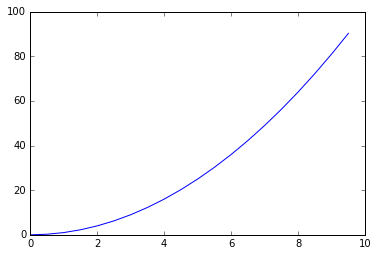

In [40]:
xvalues = my_data['values']
xsquares = my_data['squares']
plot(xvalues,  xsquares)

# 4. The Rich display system

### 4.1 Images and Youtube Videos

In [42]:
from IPython.display import Image
Image('character.png')

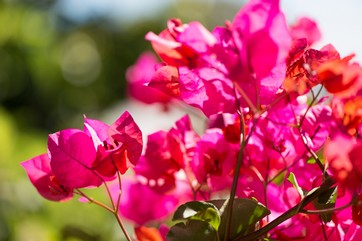

In [45]:
img = Image('http://www.imagesource.com/Doc/IS0/Media/TR5/7/7/f/4/IS09A9H4K.jpg')
img 

By default, images are embedded in the notebook so that they can be viewed offline.
To insert a link to the image, use the following command:

In [52]:
a = Image('http://www.imagesource.com/Doc/IS0/Media/TR5/7/7/f/4/IS09A9H4K.jpg',
          embed=False)

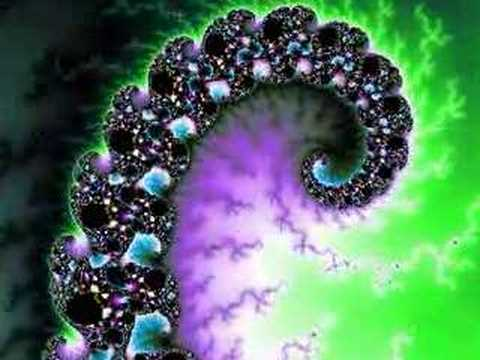

In [51]:
from IPython.display import YouTubeVideo
YouTubeVideo('G_GBwuYuOOs')

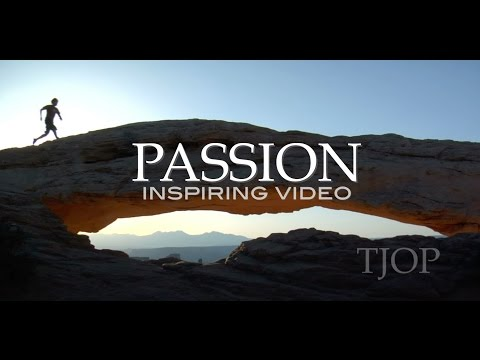

In [53]:
YouTubeVideo('_mLn99CQubI')